In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [8]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [10]:
train.describe() #Get the numerical summary

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Some observations

LoanAmount has (614 – 592) 22 missing values.

Loan_Amount_Term has (614 – 600) 14 missing values.

Credit_History has (614 – 564) 50 missing values.

We can also look that about 84% applicants have a credit_history. The mean of Credit_History field is 0.84 (Remember, Credit_History has value 1 for those who have a credit history and 0 otherwise)

The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome


In [11]:
train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [12]:
(train.dtypes == object).sum()

8

In [13]:
train.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [14]:
train.shape

(614, 13)

In [15]:
train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [16]:
# Check for missing values

train.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
# let us handle missing values for Credit History

train.pivot_table(index="Credit_History", values=["Loan_Status"], aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


This shows that when about 80% of people get loan when they have Credit History. So we can safely fill 1 for Credit History when loan status is Y and 0 for Credit History when loan status is N

In [18]:
train.loc[(train['Loan_Status']== 'Y') & train['Credit_History'].isnull(), 'Credit_History'] = 1

train.loc[(train['Loan_Status']== 'N') & train['Credit_History'].isnull(), 'Credit_History'] = 0

In [19]:
# check if Credit_History has 0 NULLS

sum(train['Credit_History'].isnull())

0

In [20]:
# let us handle missing values for self Employed

train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [21]:
train.pivot_table(index="Self_Employed", values=["Loan_Status"], aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())

,Loan_Status
Self_Employed,
No,0.686000
Yes,0.682927


In [22]:
#  Since the value of Self Employed has roughly equal effect on Loan_Status, lets impute it with 
#  the most occuring value i.e 'No'

train['Self_Employed'].fillna('No',inplace=True)

{'boxes': [<matplotlib.lines.Line2D at 0x10e4d3438>],
 'caps': [<matplotlib.lines.Line2D at 0x10e4de860>,
 'fliers': [<matplotlib.lines.Line2D at 0x10e4e2a90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10e4e2278>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10e4c8f98>,
  <matplotlib.lines.Line2D at 0x10e4d3f60>]}

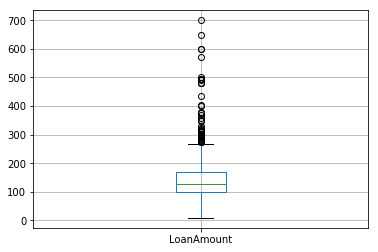

In [23]:
# let us look at Loan Amount

train.boxplot(column='LoanAmount',return_type='dict')

Loan Amount contains a lot of outliers

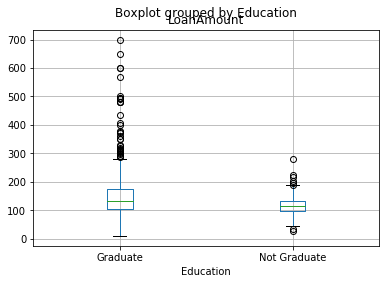

In [24]:
train.boxplot(column='LoanAmount', by = 'Education')

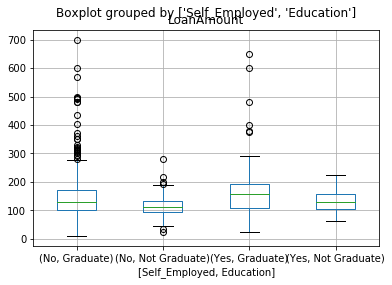

In [25]:
train.boxplot(column='LoanAmount', by = ['Self_Employed','Education'])

In [26]:
train.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [27]:
median_values=train.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

In [28]:
median_values.iloc[0,0]

130.0

In [29]:
train.loc[(train['Education']== 'Graduate') & (train['Self_Employed']=='No') & train['LoanAmount'].isnull(), 'LoanAmount']= median_values.iloc[0,0]

In [30]:
train.loc[(train['Education']== 'Graduate') & (train['Self_Employed']=='Yes') & train['LoanAmount'].isnull(), 'LoanAmount']= median_values.iloc[1,0]

In [31]:
train.loc[(train['Education']== 'Not Graduate') & (train['Self_Employed']=='Yes') & train['LoanAmount'].isnull(), 'LoanAmount']= median_values.iloc[1,1]

In [32]:
train.loc[(train['Education']== 'Not Graduate') & (train['Self_Employed']=='No') & train['LoanAmount'].isnull(), 'LoanAmount']= median_values.iloc[0,1]

In [33]:
sum(train['LoanAmount'].isnull())

0

In [34]:
# let us explore gender

train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [35]:
train.pivot_table(index="Gender", values=["Loan_Status"], aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())

,Loan_Status
Gender,
Female,0.669643
Male,0.693252


In [36]:
train.pivot_table(index="Married", values=["Loan_Status"], aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())

,Loan_Status
Married,
No,0.629108
Yes,0.716080


In [37]:
train.pivot_table(index="Dependents", values=["Loan_Status"], aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())

,Loan_Status
Dependents,
0,0.689855
1,0.647059
2,0.752475
3+,0.647059


In [38]:
train.pivot_table(index="Loan_Amount_Term", values=["Loan_Status"], aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())

,Loan_Status
Loan_Amount_Term,
12.0,1.000000
36.0,0.000000
60.0,1.000000
84.0,0.750000
120.0,1.000000
180.0,0.659091
240.0,0.750000
300.0,0.615385
360.0,0.701172


In [39]:
train[['Loan_Amount_Term','LoanAmount']].groupby('Loan_Amount_Term').mean()

,LoanAmount
Loan_Amount_Term,
12.0,111.000000
36.0,117.500000
60.0,140.000000
84.0,132.250000
120.0,22.333333
180.0,145.954545
240.0,121.250000
300.0,185.153846
360.0,146.600586


In [40]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

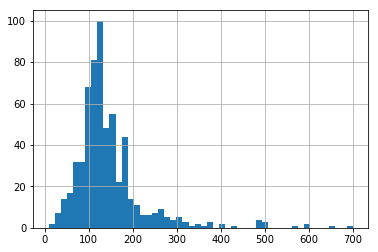

In [41]:
train['LoanAmount'].hist(bins=50)

As clear from histogram as well as boxplot, there are outliers in Loan Amount data. Log transformation may help to normalize these values. 

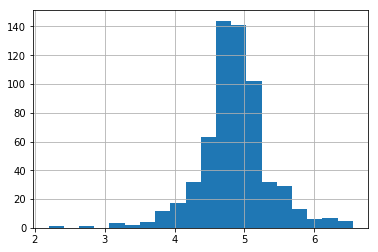

In [42]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

The log of the variable is more close to normal distribution

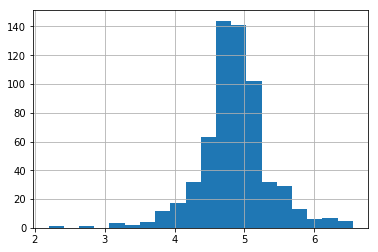

In [43]:
# Apply the log function to the sum of Applicant Income and CoApplicant Income

train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['TotalIncome_log'] = np.log(train['TotalIncome'])
train['LoanAmount_log'].hist(bins=20) 

In [44]:
# Important variables: Credit_History, Loan Amount, Total Income

In [45]:
# Converting all the categoricaal variables into numeric:

for i in range((train.shape[0])):
    if(train.loc[i,'Self_Employed']=='No'):
        train.loc[i,'Self_Employed']=0
    else:
        train.loc[i,'Self_Employed']=1
        
for i in range((train.shape[0])):
    if(train.loc[i,'Education']=='Not Graduate'):
        train.loc[i,'Education']=0
    else:
        train.loc[i,'Education']=1

for i in range((train.shape[0])):
    if(train.loc[i,'Property_Area']=='Rural'):
        train.loc[i,'Property_Area']=0
    else:
        train.loc[i,'Property_Area']=1      
        

In [46]:
# Check the values

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_log,TotalIncome_log
0,LP001002,Male,No,0,1,0,5849,0.0,130.0,360.0,1.0,1,Y,5849.0,4.867534,8.674026
1,LP001003,Male,Yes,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N,6091.0,4.852030,8.714568
2,LP001005,Male,Yes,0,1,1,3000,0.0,66.0,360.0,1.0,1,Y,3000.0,4.189655,8.006368
3,LP001006,Male,Yes,0,0,0,2583,2358.0,120.0,360.0,1.0,1,Y,4941.0,4.787492,8.505323
4,LP001008,Male,No,0,1,0,6000,0.0,141.0,360.0,1.0,1,Y,6000.0,4.948760,8.699515


In [47]:
# Build Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

outcome_var = 'Loan_Status'
model = LogisticRegression()
predictors = ['Credit_History','Property_Area','LoanAmount_log','TotalIncome_log']

#Fit the model:
model.fit(train[predictors],train[outcome_var])

#Make predictions on training set:
predictions = model.predict(train[predictors])

#Print accuracy
accuracy = metrics.accuracy_score(predictions,train[outcome_var])
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 83.062%
